In [18]:
# Exploratory Data Analysis (EDA) is the process of using visual and statistical methods to learn about the dataset.
# It is usually the first step taken, before training a machine learning model.

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_ROOT = Path.cwd().parent

RAW_DATA_DIR = PROJECT_ROOT / 'data' / 'raw'
RAW_DATA_DIR.mkdir(parents=True, exist_ok=True)
FIG_DIR = PROJECT_ROOT / 'reports' / 'figures'
FIG_DIR.mkdir(parents=True, exist_ok=True)

#source: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

csv_path = RAW_DATA_DIR / 'us_accidents.csv'
df = pd.read_csv(csv_path)


In [19]:
selected_columns = [
  'ID', # unique identifier of the accident record
  'Severity', # severity of the accident (impact on traffic delay) [1 to 4]
  'Distance(mi)', # length of road affected by accident (in miles)
  'State', # state of US in which the accident occurred
  'Temperature(F)', # weather parameter - Temperature # 12 C (ambient)
  'Wind_Chill(F)', # weather parameter - Wind Chill # 10 C (feels like)
  'Humidity(%)', # weather parameter - Humidity
  'Pressure(in)', # weather parameter - Pressure (in inches)
  'Visibility(mi)', # weather parameter - Visibility (in miles)
  'Wind_Direction', # weather parameter - Wind Direction
  'Wind_Speed(mph)', # weather parameter - Wind Speed (in miles per hour)
  'Precipitation(in)', # weather parameter - Precipitation (in inches)
  'Weather_Condition', # weather description (sunny, rain, snow etc)
  'Sunrise_Sunset' # time of the day - day / night
]

# missing values are threat to us
df = (df.loc[:, selected_columns]).copy() # we are saying get all rows, and get these columns of the rows
#df.sample(7)
stats = df.describe()
#df.info() # shows how many non-null values

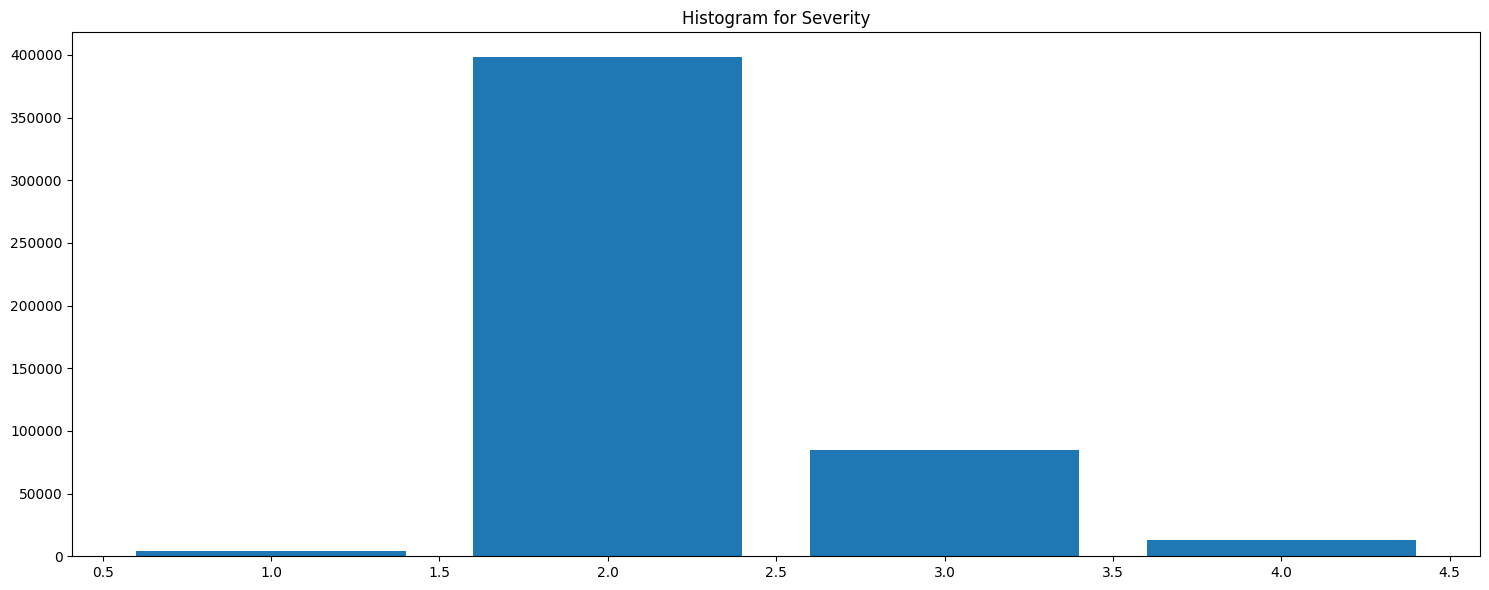

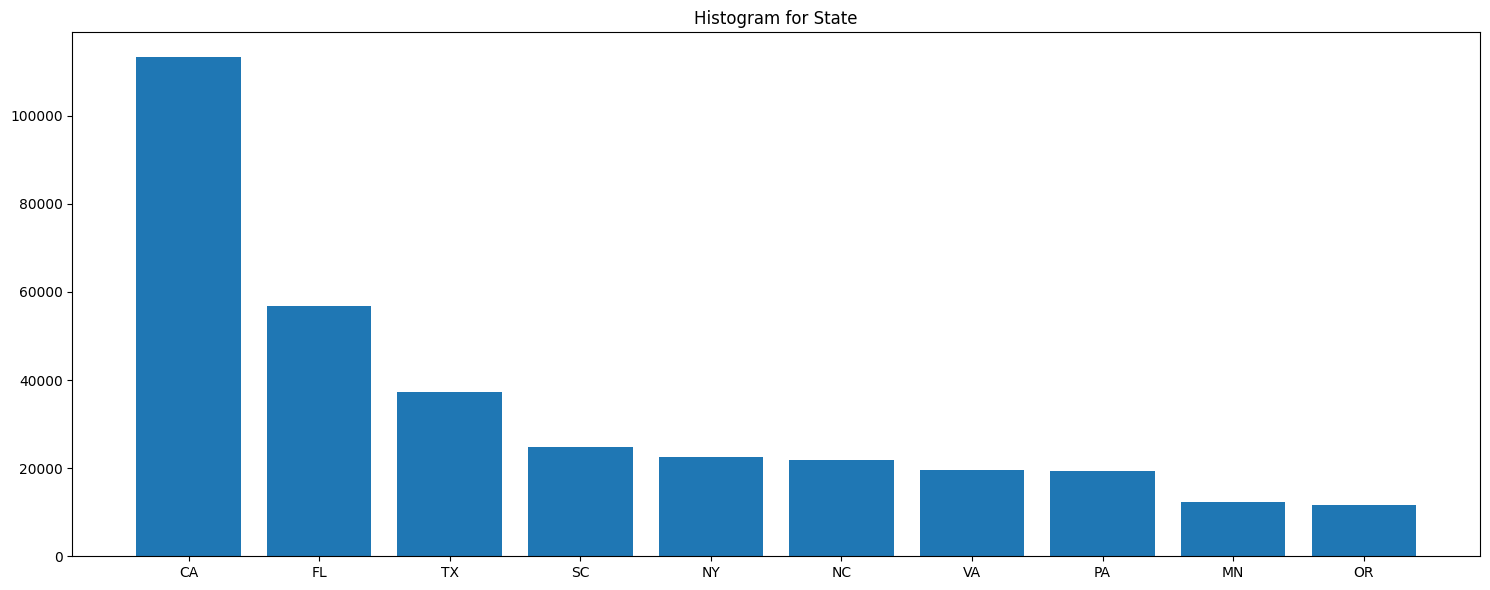

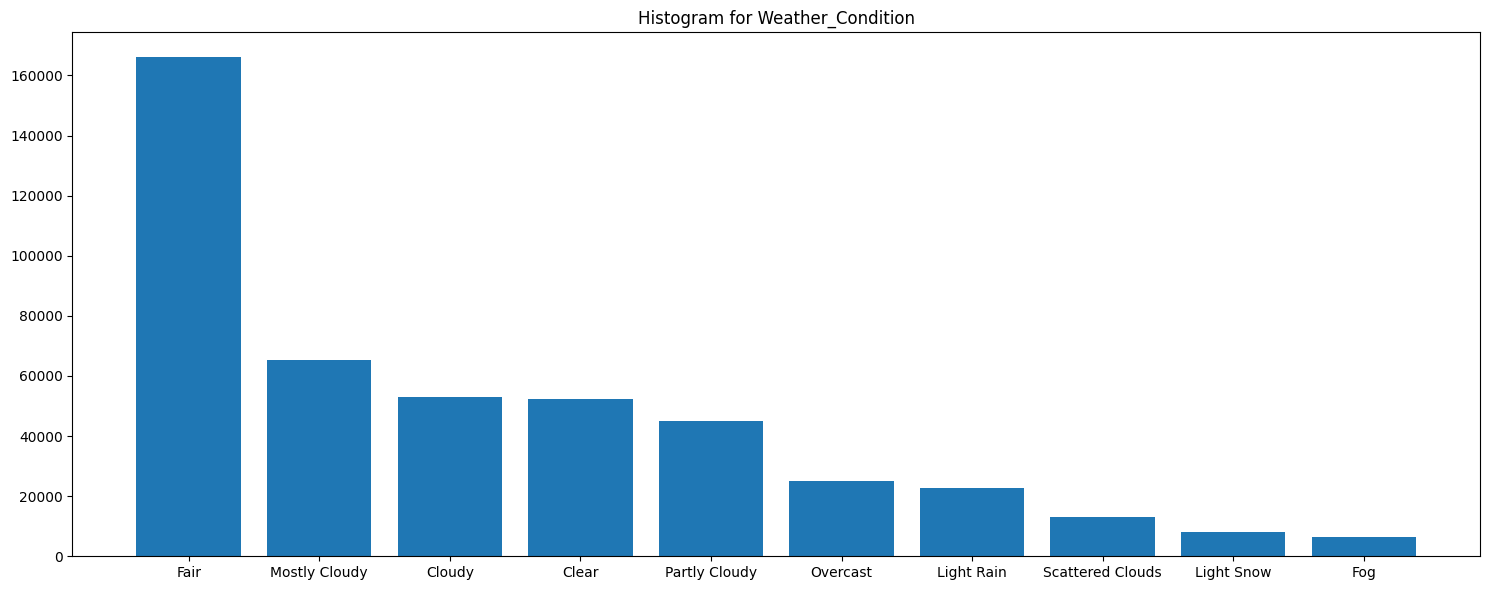

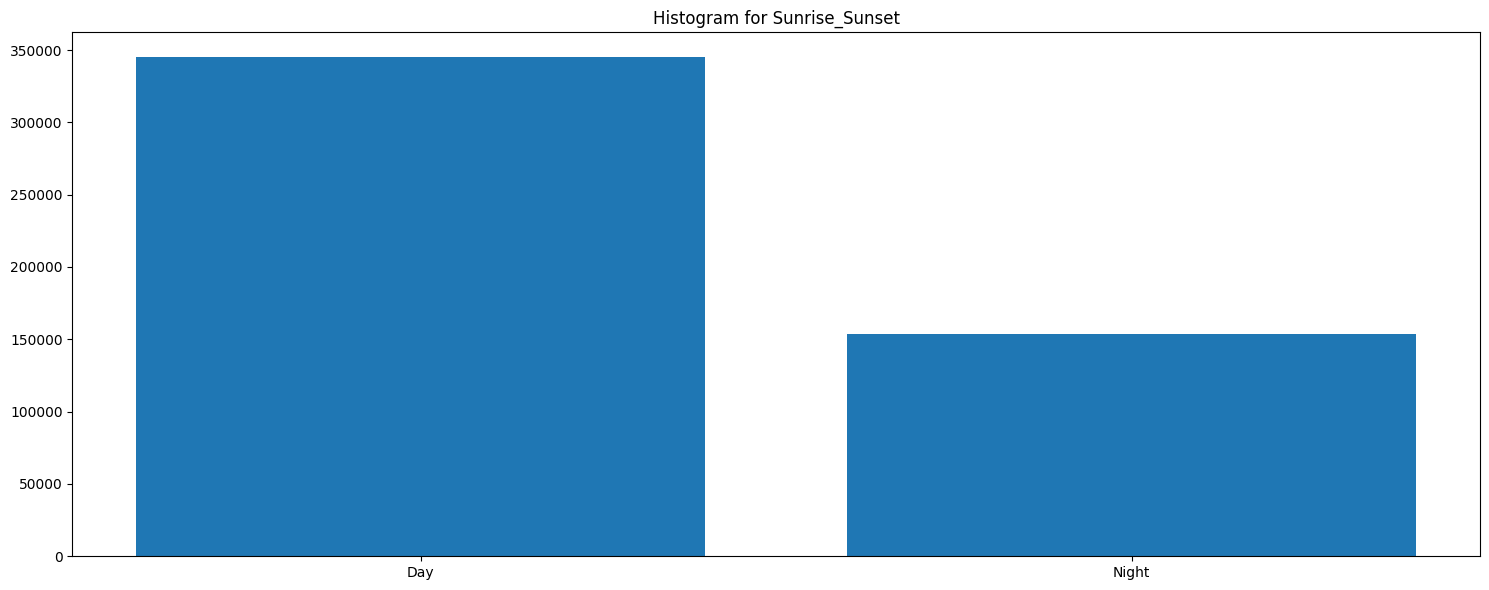

In [20]:

# value counts - frequency table (all unique values with their counts)
# histogram - frequency table visualized (top 10 values only)
for column in ['Severity', 'State', 'Weather_Condition', 'Sunrise_Sunset']:
  plt.figure(figsize = (15, 6))

  # plt.hist(x = us_accidents_df[column])

  frequencies = df[column].value_counts()[:10]
  plt.bar(
    x = frequencies.index,
    height = frequencies
  )

  plt.title(f'Histogram for {column}')
  plt.tight_layout()
  plt.show()

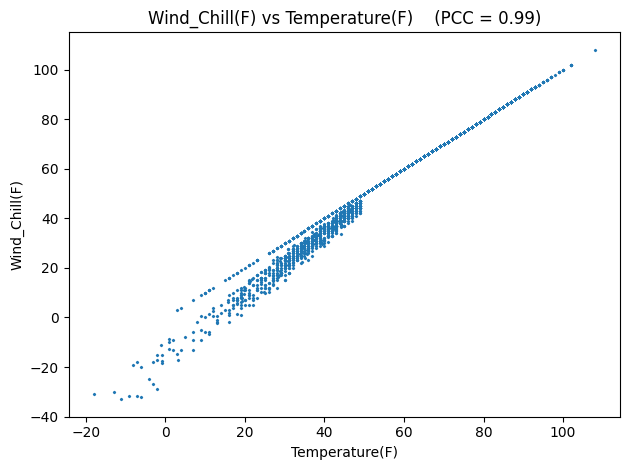

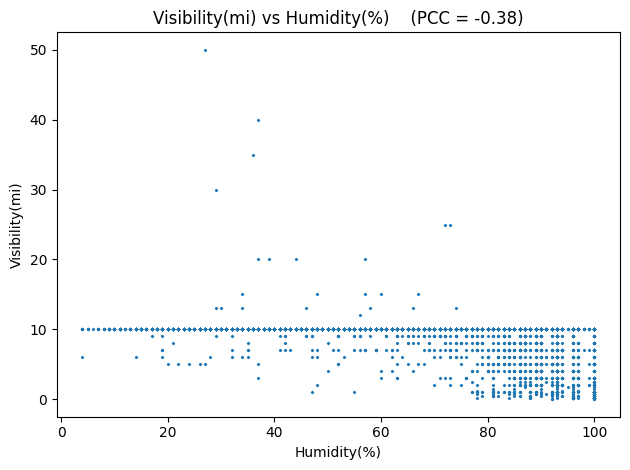

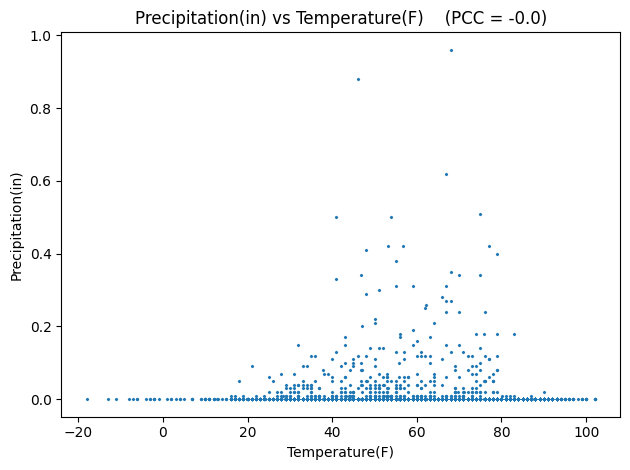

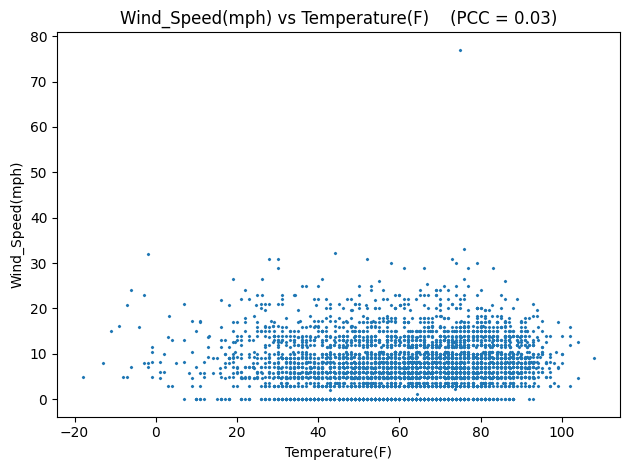

In [21]:
analysed_pairs = [
['Temperature(F)', 'Wind_Chill(F)'],
['Humidity(%)', 'Visibility(mi)'],
['Temperature(F)', 'Precipitation(in)'],
['Temperature(F)', 'Wind_Speed(mph)']
]

# sample rows from the data frame to avoid clutter in the plots
sampled_df = df.sample(5000)

for column_pair in analysed_pairs:
  x_column = column_pair[0]
  y_column = column_pair[1]

  # corr method calculates coefficient of correlation
  corrleation_coefficient = df[x_column].corr(df[y_column])

  plt.figure()

  plt.scatter(
    x = sampled_df[x_column],
    y = sampled_df[y_column],
    marker = 'x',
    s = 2
  )

  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f'{y_column} vs {x_column}\
    (PCC = {round(corrleation_coefficient, 2)})')
  plt.tight_layout()
  plt.show()

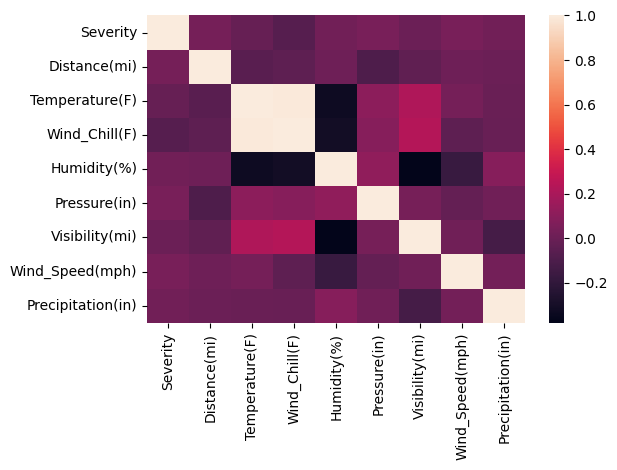

In [ ]:
df_with_numeric_columns = df[stats.columns]
corr_matrix = df_with_numeric_columns.corr()
#corr_matrix
sns.heatmap(corr_matrix)
plt.tight_layout()
plt.show()

# we can remove highly correlated columns since they essentially act like duplicates during model training
# diagonal all high cuz its a symmetric matrix, all diagonal elements = 1 since its correlation with oneself
